## Gradient Descent

After predicting we need to `compare` this gives us a measurement of how much a prediction is missed by

After `Compare` we `Learn`, It tells each weight how it can change to reduce the error

In [1]:
knob_weight = 0.5
input = 0.5
goal_pred = 0.8

pred = input * knob_weight
error = (pred - goal_pred) ** 2 # Forces the raw error to be pos by mul it by itself
print(error)

0.30250000000000005


### Simple form of making neural network learn

we use `Hot and Cold Learning` it means wiggling the weights to see which direction reduces the error the most, moving the weights in that direction, and repeating until the error gets to 0.

In [10]:
weight = 0.1
lr = 0.1

def neural_network(input, weight):
    pred = input * weight
    return pred

number_of_toes = [8.5]
win_or_loss_binary = [1]

input = number_of_toes[0]
true = win_or_loss_binary[0]

pred = neural_network(input, weight)
p_up = neural_network(input, weight - lr)

error = (pred - true) ** 2
e_up = (p_up - true) ** 2
print(round(e_up, 4))

1.0


### Breaking Gradient Descent

In [14]:
weight = 0.5
goal_pred = 0.8
input = 0.5

for iteration in range(5):
    pred = input * weight
    error = (pred - goal_pred) ** 2
    delta = pred - goal_pred
    weight_delta = input * delta
    weight = weight - weight_delta
    print("Error:" + str(error) + "Predictions:" + str(pred))

Error:0.30250000000000005Predictions:0.25
Error:0.17015625000000004Predictions:0.3875
Error:0.095712890625Predictions:0.49062500000000003
Error:0.05383850097656251Predictions:0.56796875
Error:0.03028415679931642Predictions:0.6259765625


### Introducing Alpha

Alpha reduces the weight update so it doesn't overshoot. How does this work
<div align='center'>
<b><i>weight = weight - derivative</b></i>
</div>

Accounting for alpha its a rather small change, Notice if alpha is small(say, 0.01), it will reduce the weight consistantly, thus preventing it from exploding

<div align='center'>
<b><i>weight = weight - (alpha * derivative)</i></b>
</div>


In [17]:
weight = 0.5
goal_pred = 0.8
input = 2
alpha = 0.1

for iteration in range(5):
    pred = input * weight
    error = (pred - goal_pred) ** 2
    derivative = input * (pred - goal_pred)
    weight = weight - (alpha * derivative)
    
    print("Error: " + str(error) + " Prediction: " + str(pred))

Error: 0.03999999999999998 Prediction: 1.0
Error: 0.0144 Prediction: 0.92
Error: 0.005183999999999993 Prediction: 0.872
Error: 0.0018662400000000014 Prediction: 0.8432000000000001
Error: 0.0006718464000000028 Prediction: 0.8259200000000001


## Generalizing Gradient Descent

- Go through Gradients with multiple inputs
- Freezing one weight what does it do?
- Gradient descent with multiple ouputs
- Gradient descent with multiple input & outputs
- Visualizing weights values


### Gradient descent with single inputs

- An empty network with single inputs
- we do predict + compare: Making a prediction, and calculating error and delta
- To learn we calculate each weight_delta and putting it on each weight
- After learning we update weights

In [7]:
# Gradient descent with multiple input

def w_sum(a, b):
    assert(len(a) == len(b))
    output = 0
    
    for i in range(len(a)):
        output += (a[i] * b[i])
    
    return output

def neural_network(input, weights):
    pred = w_sum(input, weights)
    return pred

weights = [0.1, 0.2, -.1]

toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

win_or_loss = [1, 1, 0, 1]
true = win_or_loss[0]

input = [toes[0], wlrec[0], nfans[0]]
#pred = neural_network(input, weights)

alpha = 0.01 # learning rate

# Tracker:
errors = []
w0, w1, w2 = [], [], []

for iter in range(10):
    total_error = 0
    for i in range(len(toes)):
        
        x = [toes[i], wlrec[i], nfans[i]]
        y_true = win_or_loss[i]
        
        # Forward pass
        pred = neural_network(x, weights)
        
        # error + delta handling
        error = (pred - y_true) ** 2
        delta = pred - y_true
        total_error += error
        
        # update weights (Gradient descent)
        for j in range(len(weights)):
            weights[j] -= alpha * delta * x[j]
            
    # record per-batch
    errors.append(total_error)
    w0.append(weights[0])
    w1.append(weights[1])
    w2.append(weights[2])

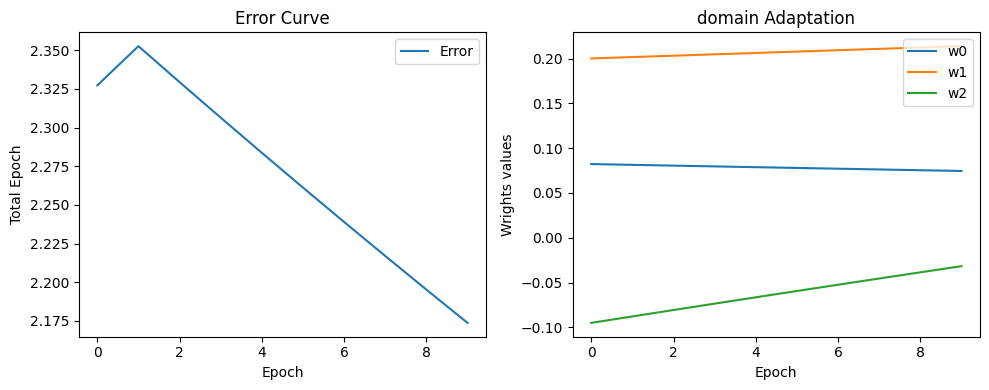

In [11]:
### Plotting the results:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# error curve
plt.subplot(1, 2, 1)
plt.plot(errors, label = "Error")
plt.xlabel("Epoch")
plt.ylabel("Total Epoch")
plt.title('Error Curve')
plt.legend()

# Weight updates
plt.subplot(1, 2, 2)
plt.plot(w0, label='w0')
plt.plot(w1, label='w1')
plt.plot(w2, label='w2')
plt.xlabel('Epoch')
plt.ylabel('Wrights values')
plt.title("domain Adaptation")
plt.legend()

# showcase them
plt.tight_layout()
plt.show()

### Gradient descent learning with multiple inputs

- **Step 1:** Prediction (forward Pass)

  *The neuron computes a dot product*

$$\hat{y} = w_1x_1 + w_2x_2 + w_3x_3$$

- **Step 2:** Compare (Calculating Error and Delta)

  *We are using squared error*
  $$E = (\hat{y} - y)^2$$

- **Step 3:** Delta (gradient of error w.r.t prediction)

  *Derivative*
  $$\frac{\partial E}{\partial \hat{y}} = 2(\hat{y} - y)$$

- **Step 4:** Weight Gradients

  *Each weight's gradient comes from the chain rule*
  $$\frac{\partial E}{\partial w_j} = \delta \cdot x_j$$

- **Step 5:** Weight Update
  
  Gradient descent update rule:
 
  $$w_j \leftarrow w_j - \alpha \cdot \delta x_j$$

##### *In a compact form Matrix/Vector* 

$$w \leftarrow w - \alpha \delta x$$
Where:
- $w$ is the weights vector
- $x$ is the input vector
- $\delta = \hat{y} - y$



In [2]:
def neural_network(inputs, weights):
    # Dot product of inputs and weights
    out = 0
    for i in range(len(inputs)):
        out += inputs[i] * weights[i]
    
    return out

def ele_mul(scaler, vector):
    # Multiple each element of vector by scaler
    out = [0] * len(vector)
    for i in range(len(vector)):
        out[i] = vector[i] * scaler
    
    return out

# Train data
toes =  [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
win_or_lose_binary = [1, 1, 0, 1]

# Inputs:
inputs = [toes[0], wlrec[0], nfans[0]]
true = win_or_lose_binary[0]

# Init weights:
weights = [0.1, 0.2, 0.3]
alpha = 0.01

# training loop

for iteration in range(3):
    
    # Forward pass
    pred = neural_network(inputs, weights)
    
    # Error and delta
    error = (pred - true) ** 2
    delta = pred - true
    
    # weight update
    weight_deltas = ele_mul(delta, inputs)
    
    # Update weights with gradient descent
    for i in range(len(weights)):
        weights[i] -= alpha * weight_deltas[i]
        
    # Print Progress
    print(f"Iteration {iteration+1}")
    print(f"  Prediction: {pred:.4f}")
    print(f"  Error: {error:.4f}")
    print(f"  Delta: {delta:.4f}")
    print(f"  Weights: {weights}")
    print(f"  Weight Deltas: {weight_deltas}\n")

Iteration 1
  Prediction: 1.3400
  Error: 0.1156
  Delta: 0.3400
  Weights: [0.0711, 0.19779000000000002, 0.29591999999999996]
  Weight Deltas: [2.8900000000000006, 0.22100000000000006, 0.4080000000000001]

Iteration 2
  Prediction: 1.0880
  Error: 0.0077
  Delta: 0.0880
  Weights: [0.0636185125, 0.19721788625000003, 0.29486378999999996]
  Weight Deltas: [0.7481487499999988, 0.05721137499999991, 0.10562099999999983]

Iteration 3
  Prediction: 1.0228
  Error: 0.0005
  Delta: 0.0228
  Weights: [0.061681742423437505, 0.1970697803029688, 0.29459036363624996]
  Weight Deltas: [0.19367700765624973, 0.01481059470312498, 0.02734263637499996]



### Freezing one weight: What does it do?

In this method, we will be training again, except weight $a$ won't be adjusted. we have to train using only weight $b$ and $c$

In [3]:
def neural_network(input, weights):
    
    out = 0
    for i in range(len(input)):
        out += (input[i] * weights[i])
    return out

def ele_mul(scaler, vector):
    out = [0] * len(vector)
    for i in range(len(out)):
        out[i] = vector[i] * scaler
    return out

# Train data
toes =  [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

win_or_lose_binary = [1, 1, 0, 1]
true = win_or_lose_binary[0]

alpha = 0.01
weights = [0.1, 0.2, -0.1]
input = [toes[0], wlrec[0], nfans[0]]

# training loop
for iteration in range(3):
    
    pred = neural_network(input, weights)
    
    error = (pred - true) ** true
    delta = pred - true
    
    weight_deltas = ele_mul(delta, input)
    weight_deltas[0] = 0 # freezing one-weight
    
    print(f"Iteration {iteration+1}")
    print(f"  Prediction: {pred:.4f}")
    print(f"  Error: {error:.4f}")
    print(f"  Delta: {delta:.4f}")
    print(f"  Weights: {weights}")
    print(f"  Weight Deltas: {weight_deltas}\n")
    
    for iter in range(len(weights)):
        weights[i] -= alpha * weight_deltas[i]

Iteration 1
  Prediction: 0.8600
  Error: -0.1400
  Delta: -0.1400
  Weights: [0.1, 0.2, -0.1]
  Weight Deltas: [0, -0.09099999999999994, -0.16799999999999987]

Iteration 2
  Prediction: 0.8660
  Error: -0.1340
  Delta: -0.1340
  Weights: [0.1, 0.2, -0.09496]
  Weight Deltas: [0, -0.0870687999999999, -0.1607423999999998]

Iteration 3
  Prediction: 0.8718
  Error: -0.1282
  Delta: -0.1282
  Weights: [0.1, 0.2, -0.09013772800000001]
  Weight Deltas: [0, -0.08330742783999998, -0.15379832831999996]



### Gradient Descent with Multiple Inputs & Outputs

**Neural Network can also make multiple predictions using multiple Inputs**

Gradient descent generalizes to arbitrarily large networks

In [5]:
import matplotlib.pyplot as plt
import random

In [6]:
# data
toes  = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

# True Labels
Y = [
    [1, 0.5],
    [1, 1.0],
    [0, 0.0],
    [1, 0.7]
]

# Training data:
X = [[toes[i], wlrec[i], nfans[i]] for i in range(4)]

# Initialize weights: 2 outputs X 3 inputs
W = [[random.uniform(-0.1, 0.1) for _ in range(3)] for _ in range(2)]

In [8]:
alpha = 0.01
epochs = 5

errors = []

def forward(x, W):
    '''
    Compute predictions: y_hat = W @ x
    '''
    return [sum(W[j][i] * x[i] for i in range(len(x))) for j in range(len(W))]

for epoch in range(epochs):
    total_error = 0.0
    
    for x, y_true in zip(X, Y):
        y_hat = forward(x, W)
        
        # Error (Squared)
        total_error += sum((y_hat[j] - y_true[j]) ** 2 for j in range(len(y_true)))
        
        # gradients & weight update
        for j in range(len(W)):
            delta = y_hat[j] - y_true[j]
            for i in range(len(W[j])):
                W[j][i] -= alpha * delta * x[i]
                
    errors.append(total_error)

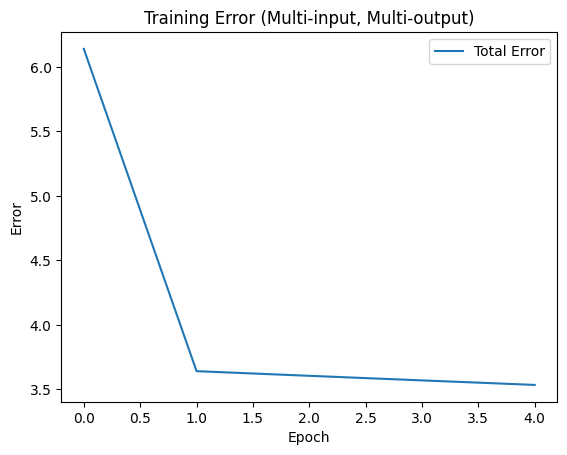

In [9]:
plt.plot(errors, label="Total Error")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Training Error (Multi-input, Multi-output)")
plt.legend()
plt.show()

In [10]:
print("Final weights:")
for j in range(len(W)):
    print(f"Output {j+1}: {W[j]}")

Final weights:
Output 1: [0.08061692533480325, 0.0022103876608782318, 0.11160294967481485]
Output 2: [0.06054691565210271, 0.05819347677023562, -0.0165256200402205]
